# Model GARCH

## 1. GARCH with theta given

### UQSA for GARCH
we need to calculte the $$H(x, r_t) = \frac{1}{|\tilde\theta|}A^T\left(\sum_{k=1}^H r_{T_{\text{reb}}+k}r^T_{T_{\text{reb}}+k}\right)(Ax+b),$$
from the $r_{T_{\text{reb}}}$ given. Then things goes easy to perform almost the same thing like what we have done with the toy model.

To begin with, we simply take $H = 1$ and we fix the $\theta$ parameters.
$$w(x)=(x_1, x_2, ... x_{n-1}, 1-\sum_i^{n-1}x_i)^T = Ax+b,$$
where
$$
A 
= 
\begin{pmatrix} 
1 & 0 & \cdots & 0\\
0 & 1 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & \cdots & 0 & 1 \\
-1 & -1 & \cdots & -1
\end{pmatrix}_{n\times(n-1)},
b = (0,\, 0,\,\cdots,0,\,1)^T\in \mathbb{R}^{n}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.integrate import quad

In [4]:
def plot_trace(h,y=None):
    l = np.shape(h)[0]
    hh = np.array(h)
    plt.plot(hh[:l,0],label= 'Robbins Monro results')
    if y:
        plt.hlines(y = y,xmin=0,xmax=10000,colors='red',label='Theory answer')
    plt.ylim(-1.,1.)
    plt.legend(loc = 'best')
    plt.show()

(array([2.000e+00, 2.000e+00, 9.000e+00, 1.100e+01, 1.800e+01, 4.100e+01,
        7.000e+01, 7.700e+01, 1.320e+02, 1.860e+02, 2.790e+02, 4.040e+02,
        5.740e+02, 8.620e+02, 1.252e+03, 1.706e+03, 2.136e+03, 2.788e+03,
        3.373e+03, 3.878e+03, 4.628e+03, 5.305e+03, 6.077e+03, 6.482e+03,
        7.003e+03, 7.349e+03, 7.496e+03, 6.627e+03, 5.719e+03, 4.735e+03,
        4.018e+03, 3.300e+03, 2.709e+03, 2.316e+03, 1.915e+03, 1.520e+03,
        1.220e+03, 9.600e+02, 7.600e+02, 5.630e+02, 4.430e+02, 3.200e+02,
        2.590e+02, 1.820e+02, 1.320e+02, 9.400e+01, 3.400e+01, 2.400e+01,
        7.000e+00, 3.000e+00]),
 array([-0.62171326, -0.59079817, -0.55988309, -0.52896801, -0.49805293,
        -0.46713784, -0.43622276, -0.40530768, -0.37439259, -0.34347751,
        -0.31256243, -0.28164734, -0.25073226, -0.21981718, -0.18890209,
        -0.15798701, -0.12707193, -0.09615685, -0.06524176, -0.03432668,
        -0.0034116 ,  0.02750349,  0.05841857,  0.08933365,  0.12024874,
         0.

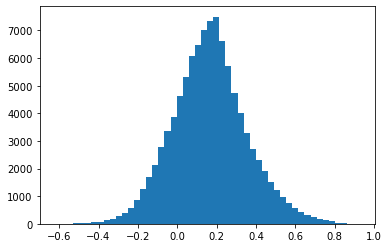

In [10]:
np.random.seed(123)
hist = []
for i in range(100000):

    hist.append(e)
hist = np.array(hist)
plt.hist(hist[:,0],bins=50)

In [14]:
np.random.seed(123)
corr = np.diag(np.ones(n))
for i in range(n):
    for j in range(i+1, n):
        corr[i, j] = corr[j, i] = np.random.uniform(-0.2, 0.8)
corr
e, v = scipy.linalg.eigh(corr)

In [15]:
import scipy.linalg
e, v = scipy.linalg.eigh(corr)
e

array([0.2792889 , 0.79608681, 1.0112754 , 1.91334889])

In [16]:
n = 4

unit = np.identity(n-1)
ones = np.ones((1, n-1))
A = np.vstack((unit, -ones))
b = np.vstack((np.zeros((n-1,1)), [[1]]))
theta = np.array([1.35e-6, 0.0622, 0.9306])
R0 = np.random.randn(n,1)
sig_mu = 1.77e-4
sig_vol=1.44e-4
sigma2_0 = np.random.randn(n,1)*sig_vol+sig_mu
Gamma = corr
theta_min = [3.2e-9,0.0329,0.8855]
theta_max = [4.32e-6,0.0955,0.9656]
the = np.array([theta_max[i] - theta_min[i] for i in range(3)])*np.random.uniform(size = (n,3)) + np.array(theta_min)
theta = the.T
A, b

(array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.],
        [-1., -1., -1.]]),
 array([[0.],
        [0.],
        [0.],
        [1.]]))

In [17]:
def H_garch(x, R, theta):
    """
    function for Robbins Monro regression for GARCH model
        E[f2(w(x),R)] = F^r(w(x)) = 0 
        Note that A is of dim (d,d-1) (d = n = len(R_))
    inputs :
            x :   n-1 vector in the regression
            R :   A random vector to perform the RM
        theta :   generate parameter given
    return : f(w,R) of dimension n-1
    """
    x_, R_= x.reshape(n-1,1), R.reshape(n, 1)
    
    left = np.matmul(A.T, np.matmul(R_, R_.T))
    right = np.matmul(A, x) + b
    
    result = np.matmul(left, right)
    
    return result/np.max(np.linalg.norm(theta,axis = 0))

In [18]:
def R_simulator(R0, sigma2_0, theta, Gamma, N):
    """
    n is the number of stocks/ dim of sigma
    
    Inputs:
        R0       : R_pre np.array of shape (n,1)
        sigma2_0 : sigma_pre np.array of shape (n,1)
        theta    : theta fixed in the RM model (3,n)
        Gamma    : positive defini matrix of dimension (n,n)
        N        : number of exemple we need
    
    Return:
        Rs       : matrix of dimension (n,N) of which each colume is a simulated new R
    """
    ones = np.ones((n,1))
    g = np.hstack((ones, R0**2, sigma2_0))  # n,3
    sigma2 = g.dot(theta)
    D = np.diag(np.sqrt(np.diag(sigma2)))
    eta = np.sqrt(Gamma).dot(np.random.randn(n,N))  
    return D.dot(eta)

In [19]:
ones = np.ones((n,1))
g = np.hstack((ones, R0**2, sigma2_0))  # n,3
sigma2 = g.dot(theta)
D = np.sqrt(np.diag(sigma2))
np.diag(D)

array([[0.50842204, 0.        , 0.        , 0.        ],
       [0.        , 0.11626044, 0.        , 0.        ],
       [0.        , 0.        , 0.33822689, 0.        ],
       [0.        , 0.        , 0.        , 0.20447008]])

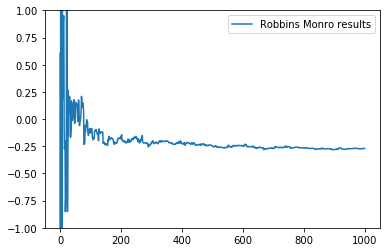

final result is 
 [[-0.2704583 ]
 [ 1.98876176]
 [-0.1100492 ]
 [-0.60825426]]


In [20]:
def RM_bis(N = 10000, alpha = 0.6):
#     R = np.random.multivariate_normal(mu, S, N)
    Rs = R_simulator(R0 = R0,sigma2_0=sigma2_0,theta=theta,Gamma=Gamma,N=N)
    x = np.random.random((n - 1, 1)) # initialization with random value
#     print(Rs.shape)
    w0 = np.vstack((x, 1 - np.sum(x)))
    w = [w0]
    w_hist = [w0.reshape(n, 1)]
    
    rg = range(N)
    if N > 1e4 :
        rg = tqdm(rg)
        
    for i in rg:
        x = x - 10.*H_garch(x, Rs[:,i],theta)/np.power(i+1, alpha)
        w_tmp = np.vstack((x, 1 - np.sum(x)))
        w.append(w_tmp)
        w_hist.append(w_tmp/np.sum(w_tmp))
        
    plot_trace(w_hist)
    
    print("final result is \n {}".format(w[-1]/np.sum(w[-1])))
#     print("compare with the theory result \n {}".format(theory_answer(S)))
    return w[-1]/np.sum(w[-1]),w,w_hist
x,_,_ = RM_bis(N = 1000,alpha = 0.65)

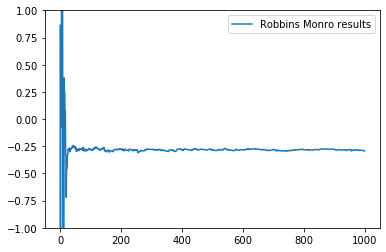

final result is 
 [[-0.29335996]
 [ 2.07293394]
 [-0.12050585]
 [-0.65906813]]


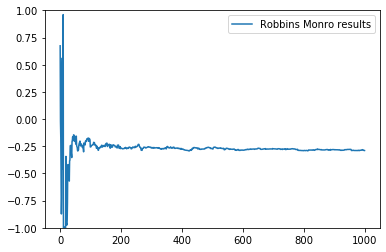

final result is 
 [[-0.28911808]
 [ 2.06091616]
 [-0.11814026]
 [-0.65365782]]


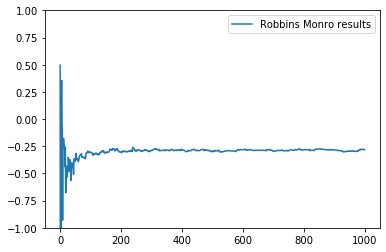

final result is 
 [[-0.28165938]
 [ 2.08270483]
 [-0.1167035 ]
 [-0.68434195]]


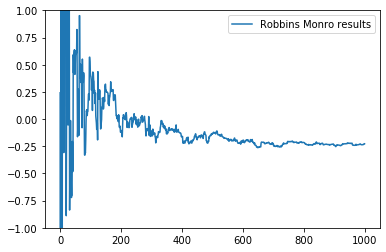

final result is 
 [[-0.2266699 ]
 [ 1.7993038 ]
 [-0.17036682]
 [-0.40226708]]


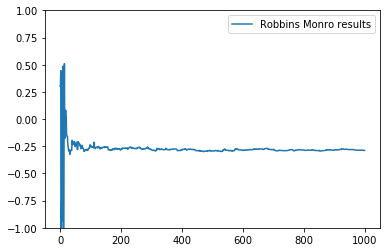

final result is 
 [[-0.28819495]
 [ 2.06183281]
 [-0.10767148]
 [-0.66596638]]


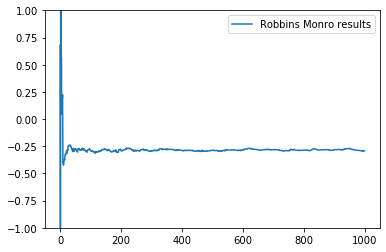

final result is 
 [[-0.29257363]
 [ 2.08342979]
 [-0.11590614]
 [-0.67495002]]


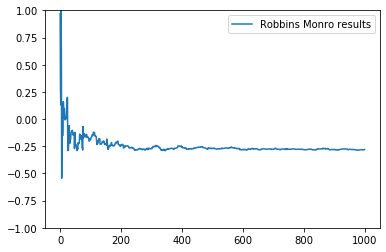

final result is 
 [[-0.2798803 ]
 [ 2.05805161]
 [-0.12290431]
 [-0.655267  ]]


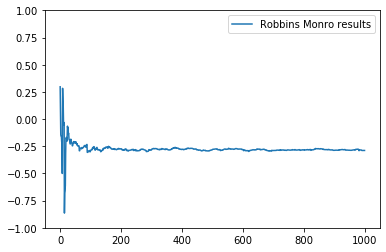

final result is 
 [[-0.28853821]
 [ 2.06748482]
 [-0.12123464]
 [-0.65771196]]


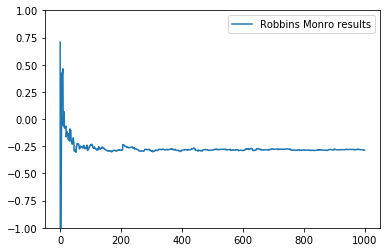

final result is 
 [[-0.28666926]
 [ 2.07102846]
 [-0.11234509]
 [-0.67201411]]


ValueError: 
$lpha$ = 0.35
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>

In [21]:
to_plot = []
for alp in np.arange(0.35,0.8,0.05):
    _,_,w_hist = RM_bis(N = 1000,alpha = 0.65)
    to_plot.append(w_hist)
l = np.shape(to_plot[0])[0]
#     l = np.shape(h)[0]
#     hh = np.array(h)
labels = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
for i,w_hist in enumerate(to_plot):
    h = np.array(w_hist)
    plt.plot(h[:l,0],label='\alpha = {}'.format(labels[i]),linewidth=1)
# plt.plot(hh[:l,0],label= 'Robbins Monro results')
plt.ylim(-1.,1.)
plt.legend(loc = 'upper right')
plt.show()

In [147]:
test = np.arange(0.35,0.8,0.05)
test

array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])

In [78]:
def para_simulate(n,theta,r_init,sig_init,GAMMA):
    """
    To comment!!!
    """
    r_pre = r_init.reshape(n,1)
    sig_pre = sig_init.reshape(n,1)
    ones = np.eye(n)
    D_t_pre = np.diag(sig_pre)
    R_t_pre = np.diag(r_pre)
    rts = []
    for h in range(1,2):
        D_t_2 = ones*the[:,0] + the[:,1]*R_t_pre**2 + the[:,2]*D_t_pre**2
        D_t = np.sqrt(D_t_2)
        V_t = D_t.dot(GAMMA).dot(D_t)
        r_t = np.random.multivariate_normal(np.zeros(n), V_t)
        rts.append(r_t)
        D_t_pre = D_t
        R_t_pre = np.diag(r_t)
    return the,rts

## 2. GARCH with UQSA

### 2.1 H=1 case

we need to calculte the $$H(x, r_t) = \frac{1}{|\tilde\theta|}A^T\left(\sum_{k=1}^H r_{T_{\text{reb}}+k}r^T_{T_{\text{reb}}+k}\right)(Ax+b),$$
from the $r_{T_{\text{reb}}}$ given. Then things goes easy to perform almost the same thing like what we have done with the toy model.

TODO LIST:
- [x] Write the new function $$H(x, r_ts)$$ where $r_ts \in \mathcal{R}^{d*H}$ of which each coloum is an array with dimension $d$ for time $T_{\text{reb}}+k$
- [ ] Modify the part at the beginning of the self.iteration of the simulation part. what we need is a series of $\theta$s and $r_t$ arrays
- [ ] Modify the u_0initialization part
- [ ] Test for debugging and choosing good prameters.

Additional explanantions:
- We want to find the optimal solution to the question for any $\theta = (w,\alpha,\beta)$ given
$$
\begin{align}
min_{\omega\in\mathbb{R}^{d}}\frac{1}{2}\omega^TS\omega,\\
\text{where, }\sum_{i=1}^d \omega_i = 1
\end{align}
$$
Note this solution by garch with UQSA is $\hat{\omega}(\theta)$ since it is in fact a function of $\theta$

- We turn to use $x$ to do the iteration to reduce complexity with the constraint. That is in the way that we put
$$w(x)=(x_1, x_2, ... x_{d-1}, 1-\sum_i^{d-1}x_i)^T$$
- Hence once we have the ideal $\hat{x}(\theta) \in \mathbb{R}^{d-1}$ we can obtain directely $\hat{\omega}(\theta)$, we want to expand the $\hat{x}(\theta)$ term in to a orthognal legendre basis such that
$$\hat{x}(\theta) = \sum_{i=1}^{m_{[k]}}u_iB_i(\theta)$$ where, $u_i \in \mathbb{R}^{d-1}$, like we do before with our toy model. However, now our $\theta$ is a vecteur, and that will cause a probleme to make the orthognal basis. To deal with it we put it in another way:
$$\hat{x}(\theta) = \sum_{\text{key}\in\text{keyboard}[m_k]}u_{\text{key}}B_{\text{key}}(\theta)$$
Here all keys in the keyboard is a key of triple tuple with the form of $(i,j,k)$ with $i,j,k \in \{0,1,...\}$ that is in **Hyperbolic cross index set**$^{\dagger}$. For a key $(i,j,k)$ given, the orthogonal basis $B_{(i,j,k)}$ is given by 
$$B_{(i,j,k)(\theta = (w,\alpha,\beta))} = B_i^{\Omega}(w)B_j^{A}(\alpha)B_k^{B}(\beta)$$
where $B^{\Omega}, B^{A}, B^{B}$ indicate seperately the orthognal legendre basis generated with data range of $(w,\alpha,\beta))$

### JOB：parameter initialization

- Legendre Basis
- r_0 ~ r_T initialisation
- keys_board


In [35]:
def LB_preparation(self):
    """
    Run to prepare a dictionary of orthognoal basis LB, for which the key is a tuple (i,j,k)
    Then it will be stored in self.LB
    """
    m_max,tmin,tmax,keys = np.max(self.m),self.theta_min,self.theta_max,self.keyboard[m_max]
    B_w = self.Legendre_B(tmin[0],tmax[0],m_max)
    B_a = self.Legendre_B(tmin[1],tmax[1],m_max)    
    B_b = self.Legendre_B(tmin[2],tmax[2],m_max)
    LB = {}
    for key in keys:
        i,j,k = key
        LB[key] = lambda theta,i=i,j=j,k=k:B_w[i](theta[0])*B_a[j](theta[1])*B_b[k](theta[2])
    self.LB = LB

In [ ]:
def basic_interation_cal(self,r_pre,s_pre,theta):
    """
    r_pre,s_pre of dim = d
    
    Return:
            r,s : dim = d
    """
    
    ones = np.eye(self.n)
    D_t_pre = np.diag(np.reshape(s_pre))
    R_t_pre = np.diag(np.reshape(r_pre))
    
    D_t_2 = ones*theta[0] + theta[1]*R_t_pre**2 + theta[2]*D_t_pre**2
    D_t = np.sqrt(D_t_2)
    V_t = D_t.dot(self.GAMMA).dot(D_t)
    r_t = np.random.multivariate_normal(np.zeros(self.n), V_t)
    return r_t,np.diag(D_t)

def theta_generator(self,n=1):
    the = np.array([self.theta_max[i] - self.theta_min[i] for i in range(3)])*np.random.uniform(size = (n,3)) + np.array(self.theta_min)
    return np.reshape(the,3) if n==1 else the

def simple_generation(self,r,s):
    """
    input r,s: series of dim=d, (r and sigma)
    ----------
    output: new r,s
    """
    the = self.theta_generator()
    return basic_interation_cal(r,s,the)

def r_preparetion(self):
    """
    with r0,sigma0, we will be able to calculate all r_t with t<=T
    """
    r,s = self.r_init,self.sigma_init
    r_t = [r]
    s_t = [s]
    for t in range(self.T):
        r,s = self.simple_generation(r,s)
        r_t.append(r)
        s_t.append(s)
    self.r_t = r_t
    self.s_t = s_t

In [ ]:
class UQSA_GARCHCCC:
    def __init__(self,K,n = 4, r_min = 0.3, r_max = 0.5, gamma = None,m = None,M = None,a = None,b=None,plot = False,
                theta_min = None,theta_max = None):
        """
        Class for the construction of UQSA generator
        
        ATTENTION:
                    - n     : dimention of \omega i.e. final solution
                    - n_iter: iteration help n, i.e. number of u_i iterated by UQSA
                    - LB    : reduced Legendre basis, with \int_{r_min}^{r_max}B_i(.)B_j(.)d\theta = \delta_{ij}
        """
        self.K = K
        # steps of iteration -------------------
        if gamma is not None:
            self.gamma = gamma
        elif b is not None:
            self.gamma = [1./np.power(k,b) for k in range(K+1)]
        else:
            self.gamma = [1./np.power(k,0.65) for k in range(K+1)]
        if not a:
            a=0.24
        self.m = [int(np.floor(np.power(k, a))) + 1 for k in range(K+1)]
        self.M = [10]*(K+1) if not M else M
        self.u0 = None
        self.u_record = None
        self.theta_min = [3.2e-9,0.0329,0.8855] if not theta_min else theta_min
        self.theta_max = [4.32e-6,0.0955,0.9656] if not theta_max else theta_max
        self.n = n                # n is the dimension of w and theoretically
#         self.n_iter = n_iter      # n_iter is the dimension of MC iteration for exemple if we take w_{n} = 1 - sum_1^{n-1}(w_{i}), then n_iter = n-1
        self.LB = None
        self.plot = plot          # Flag for plot
        #         self.LB = [np.sqrt((2*i+1)/(self.r_max-self.r_min))*np.polynomial.legendre.Legendre.basis(deg=i,domain=np.array([r_min, r_max])) for i in range(np.max(self.m)+1)]
        """
        n = 4
        unit = np.identity(n-1)
        ones = np.ones((1, n-1))
        A = np.vstack((unit, -ones))
        b = np.vstack((np.zeros((n-1,1)), [[1]]))
        theta = np.array([1.35e-6, 0.0622, 0.9306])
        R0 = np.random.randn(n,1)
        sig_mu = 1.77e-4
        sig_vol=1.44e-4
        sigma2_0 = np.random.randn(n,1)*sig_vol+sig_mu
        Gamma = corr
        theta_min = [3.2e-9,0.0329,0.8855]
        theta_max = [4.32e-6,0.0955,0.9656]
        the = np.array([theta_max[i] - theta_min[i] for i in range(3)])*np.random.uniform(size = (n,3)) + np.array(theta_min)
        theta = the.T
        A, b
        """
    def Legendre_B(self,a, b, n):
        """
        generate a normalized Legendre basis in the interval [a, b]
        n is the number of the Legendre basis needed
        """
        delta = b-a
        LB = [np.sqrt((2*i+1)/delta)*np.polynomial.legendre.Legendre.basis(deg=i) for i in range(n)]
        new = []
        for i in range(n):
            z = lambda x, i=i: LB[i]((2*x-a-b)/(b-a))
            new.append(z)
        return new
    def get_Gamma(self):
        np.random.seed(123)
        while True:
            corr = np.diag(np.ones(n))
            for i in range(n):
                for j in range(i+1, n):
                    corr[i, j] = corr[j, i] = np.random.uniform(-0.2, 0.8)
            if np.min(scipy.linalg.eigh(corr)[0])>0:
                return corr

    def f(self, x, R, theta):
        """
        function for Robbins Monro regression for GARCH model
            E[f2(w(x),R)] = F^r(w(x)) = 0 
            Note that A is of dim (d,d-1) (d = n = len(R_))
        inputs :
                x :   n-1 vector in the regression
                R :   A random vector to perform the RM
            theta :   generate parameter given
        return : f(w,R) of dimension n-1
        """
        x_, R_= x.reshape(n-1,1), R.reshape(n, 1)

        left = np.matmul(self.A.T, np.matmul(R_, R_.T))
        right = np.matmul(self.A, x) + self.b

        result = np.matmul(left, right)

        return result/np.max(np.linalg.norm(theta,axis = 0)) ##TODO!
    
    def W(self,m_k, rho, u0):
        return np.sum([u0[j]*self.LB[j](rho) for j in range(m_k+1)], axis = 0)
    
#     def S_rho(self, rho):
#         D = np.diag([.1, .14, .2])
#         # rho = 0.5
#         K = np.array([[1, rho, 0],
#                      [rho, 1, rho],
#                      [0, rho, 1]])
#         S = np.matmul(np.matmul(D, K), D)
#         return S
    
    def u0_initialization(self):
        n = self.n
        unit = np.identity(n-1)
        ones = np.ones((1, n-1))
        self.A = np.vstack((unit, -ones))
        self.b = np.vstack((np.zeros((n-1,1)), [[1]]))
        ###########################
#                   MC
        ###########################
        u0_init = []
        rss = np.linspace(self.r_min,self.r_max,101)
        for i in range(np.max(self.m) + 1):
            u0_init_i = []
            for j in range(n):
                summ = 0.0
                for r in rss:
                    summ += self.omega_theory(r)[j] * self.LB[i](r)*1e-2 *0.2 
                u0_init_i.append(summ[0])  #MC Expectation = \int w(r)B_i(r) \pi(d\theta) et \pi(d\theta) = 0.2*d\theta in this case
            u0_init.append(u0_init_i)
            
        self.u_record = [u0_init]
        self.u0 = u0_init
        return self.u_theory_result
        
    def para_simulate(self):
        """
        To comment!!!
        """
        n = self.n
        the = np.array([self.theta_max[i] - self.theta_min[i] for i in range(3)])*np.random.uniform(size = (n,3)) + np.array(self.theta_min)
        r_pre = self.r_init.reshape(n,1)
        sig_pre = self.sig_init.reshape(n,1)
        ones = np.eye(n)
        D_t_pre = np.diag(sig_pre)
        R_t_pre = np.diag(r_pre)
        rts = []
        for h in range(1,H+1):
            D_t_2 = ones*the[:,0] + the[:,1]*R_t_pre**2 + the[:,2]*D_t_pre**2
            D_t = np.sqrt(D_t_2)
            V_t = D_t.dot(self.GAMMA).dot(D_t)
            r_t = np.random.multivariate_normal(np.zeros(n), V_t)
            rts.append(r_t)
            D_t_pre = D_t
            R_t_pre = np.diag(r_t)
        return the,rts
    
    def iteration(self):
        u0 = np.array(self.u0)
#         u0 = np.random.randn(np.shape(u0)[0],np.shape(u0)[1])
        n = self.n_iter
        for k in range(1, self.K+1):
            
            theta = []
            r_ts_set = []
            for _ in range(self.M[k]+1):
                the,rts = self.para_simulate()
                theta.append(the)
                r_ts_set.append(rts)
                
            for i in range(self.m[k] + 1):
                expect = 0.0
                for s in range(1,self.M[k]+1): 
                    w = self.W(self.m[k-1], rho[s], u0)
                    expect += (self.LB[i](rho[s]) * self.f(w.reshape(n,1), R[s])).reshape(1,n)
                expect /= self.M[k]
                if i > self.m[k-1]:
                    u[i] = - self.gamma[k] * expect
                else:
                    u[i] = u0[i] - self.gamma[k] * expect
            u0 = u
            self.u_record.append(u)
        return u
    def Basis(self):
        """
        return a matrix of normalized orthogonal function basis for (w,a,b) in the form B_ijk(w,a,b)
        so that result[i,j,k] is this function `B_ijk(w,a,b)`
        """
        pass
    
    def run_out(self, rs = None):
        self.LB = self.Basis(self.r_min,self.r_max,np.max(self.m)+1)

        if rs is None:
            rs = [0.5*(self.r_min + self.r_max)]
        self.u0_initialization()

        res = self.iteration()
#         print("the u in the end of the iteration is : \n{}".format(res))
        
        for r in rs:
            x = self.W(np.max(self.m),r,res)
            calcul_answer = list(x)
            calcul_answer.append(1-sum(x))
#             print("-"*60)
#             print("and the result of rho = {} is \n {}".format(r,calcul_answer))
#             print("compare with the theory result : \n {}\n".format(self.omega_theory(r).reshape(1,self.n)))
        res = []
        for i in range(50,self.K,5):
            res.append(self.u_record[i][2][1])
        if self.plot:
            eapp = []
            u = self.u_theory_result
            u_record = self.u_record
            rhos = np.random.rand(100) * 0.2 + 0.3
            etot = []
            
            def dist(x,y):
                return sum([(x[i]-y[i])**2 for i in range(len(x))])
            for u_t in u_record:
                eapp.append(sum([dist(u_t[i],u[i]) for i in range(len(u_t))]))

            w = self.omega_theory
            for i in range(50,self.K,50):
                temp = 0.0
                for rho in rhos:
                    w_UQSA = list(uqsa.W(len(u_record[i])-1,rho,u_record[i]))
                    s = sum(w_UQSA)
                    w_UQSA.append(1.0-s)
            #         print((w_UQSA))

                    temp += (dist(w(rho),w_UQSA))
                etot.append(temp/500)  
#                 eapp_toplt = eapp[50:1000:50]
#                 diff = [etot[i] - eapp_toplt[i] for i in range(len(etot))]
#                 plt.plot(range(50,1000,50),etot,label = 'total error')
#                 plt.plot(range(50,1000,50),eapp_toplt, label = 'approx error')
#                 plt.legend(loc='best')
#             fig ,(ax1,ax2) = plt.subplots(2)    
                
#             ax1.plot(range(len(eapp)),eapp)  
#             ax2.plot(range(50,self.K,50),etot,label = 'total error') 
#             ax2.plot(range(50,self.K,50),eapp[50:self.K:50],label = 'approx error') 
#             ax2.legend(loc='best')
            
#             plt.show()
#             plt.title("error approximation")
        return res

#### TO DO LIST
General tasks:
    
- [ ] keyboard
- [ ] prepare_data
    - [ ] initialization of 